![image.png](attachment:image.png)

## Домашнее задание "Визуализация данных и описательная статистика"

**Попробуем провести базовую разведку данных ([EDA](https://teletype.in/@pythontalk/eda_instruments)).**

Вам предложено два датасета на выбор: про машины и про зарплаты.

Превью данных и прямые ссылки на raw-файлы — ниже.

Информация по первому набору:
- Brand: The brand or manufacturer of the car.
- Model: The specific model of the car.
- Color: The color of the car's exterior.
- Registration Date: The date when the car was registered (Month/Year).
- Year of Production: The year in which the car was manufactured.
- Price in Euro: The price of the car in Euros.
- Power: The power of the car in kilowatts (kW) and horsepower (ps).
- Transmission Type: The type of transmission (e.g., automatic, manual).
- Fuel Type: The type of fuel the car requires.
- Fuel Consumption: Information about the car's fuel consumption in L/100km ang g/km.
- Mileage: The total distance traveled by the car in km.
- Offer Description: Additional description provided in the car offer.

Информация по второму набору:
- Age: The age of the individuals in the dataset, representing their chronological age in years.
- Gender: The gender identification of the individuals, indicating their gender or gender identity.
- Education Level: The highest level of education attained by the individuals, indicating their educational qualifications or degree.
- Job Title: The occupation or job title of the individuals, specifying their professional role or position.
- Years of Experience: The number of years of professional experience accumulated by the individuals in their respective fields.
- Salary: The income level or salary earned by the individuals, denoting their monetary compensation.
- Country: The country of residence or origin of the individuals, providing geographical information.
- Race: The racial background or ethnicity of the individuals, reflecting their specific racial or ethnic group.

Вы также можете использовать любые другие данные на ваш выбор, но убедитесь, что в ноутбуке оставлены аутпуты ячеек, а также указан источник, с которым вы работали.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sal = pd.read_csv('https://raw.githubusercontent.com/catprokhorova/HW_datasets/main/EDA_1/salary_dataset.csv')
sal.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


## Задание:
- Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.
- Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.
- Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически (один вопрос/гипотеза — один график).

Вы можете использовать любую библиотеку для визуализации данных. Гайд по применению основных методов построения графиков из библиотеки `matplotlib` можно найти [по ссылке](https://pythonru.com/biblioteki/tipy-grafikov-v-matplotlib-plt3).

#### *Желательно, но не обязательно:*

- Если данные содержат пропуски, заполните их и обоснуйте своё решение. Проверьте, как изменились базовые статистики до и после замены.

**Требования по оформлению графиков:**

У графиков должен быть заголовок, подписи осей, легенда (опционально). Каждая визуализация должным образом оформлена и может быть интерпретирована даже в отрыве от контекста.

**Важно!**

Оставляйте свои комментарии к графикам: отвечает ли визуализация на поставленный вопрос, что вы наблюдаете в данных, какие выводы можно сделать и т.д. Ход ваших мыслей так же важен, как и написанный вами код.

**Подготовка данных**

In [3]:
sal.drop(["Unnamed: 0"], axis=1, inplace=True) #Исключаем неинформативный столбец

In [4]:
sal.shape #Проверяем размер датафрейма

(6704, 8)

In [5]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 419.1+ KB


In [6]:
sal.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [7]:
sal.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [8]:
sal[sal['Salary'].isnull()] #Пропуски заполнены значениями NaN, значит для их удаления можем использовать dropna

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN,Canada,White
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,USA,White
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN,Canada,White


In [9]:
sal_1 = sal.dropna(how='any') #Поскольку количество пропусков незначительно, то можем удалить строки, содержащие такие пропуски

**Узнаем базовую информацию по датафрейму**

In [10]:
sal_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
 6   Country              6698 non-null   object 
 7   Race                 6698 non-null   object 
dtypes: float64(3), object(5)
memory usage: 471.0+ KB


In [11]:
sal_1.describe() #Базовые статистики по числовым столбцам (после удаления строк с пропусками) почти не изменились

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


**Однофакторный анализ (по столбцам)**

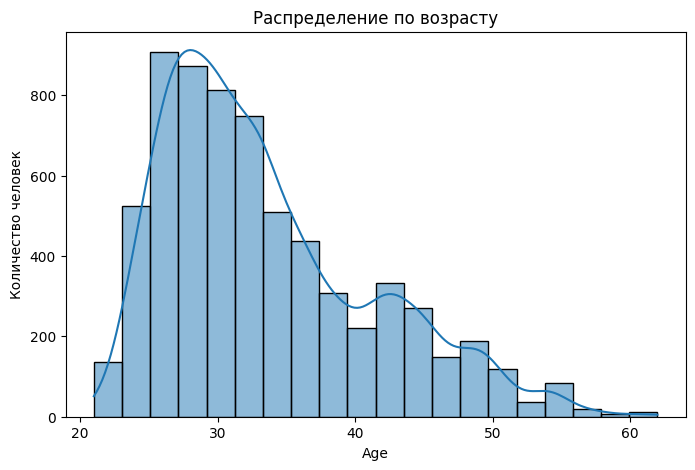

In [12]:
plt.figure(figsize=[8,5])
sns.histplot(data=sal_1, x="Age", bins=20, kde=True)
plt.title("Распределение по возрасту")
plt.ylabel("Количество человек")
plt.show()
#Ненормальное распределение. Возрастной контингент в основном это люди от 25 до 35 лет

In [13]:
sal_1["Gender"].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

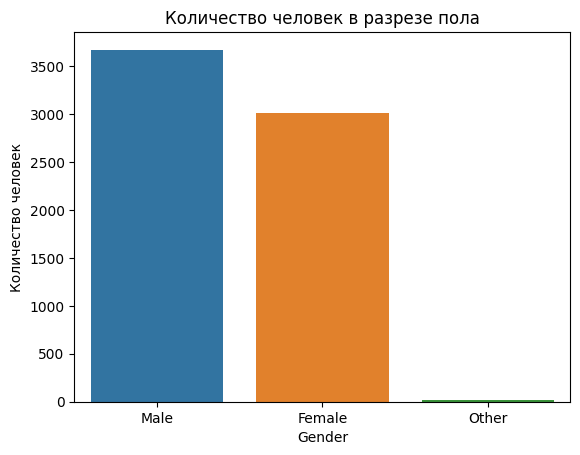

In [14]:
sns.countplot(data=sal_1, x="Gender", hue = 'Gender')
plt.title("Количество человек в разрезе пола")
plt.ylabel("Количество человек")
plt.show()
#Выборка содержит чуть больше информации по мужчинам. Есть некоторое кол-во человек, кто не захотел указывать пол.

In [61]:
sal_el = sal_1["Education Level"].value_counts().to_frame().reset_index()
sal_el.columns = ['Education Level', 'Count']
sal_el.info()
sal_el
#Из-за различий в наименовании категории есть парные строки, значения по которым надо сложить

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Education Level  7 non-null      object
 1   Count            7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


,Education Level,Count
0,Bachelor's Degree,2265
1,Master's Degree,1572
2,PhD,1368
3,Bachelor's,756
4,High School,448
5,Master's,288
6,phD,1


In [62]:
#Суммируем значения парных строк и добавляем в конец таблицы
sal_el = sal_el._append(sal_el.iloc[[0, 3]].sum(axis=0), ignore_index=True)
sal_el = sal_el._append(sal_el.iloc[[1, 5]].sum(axis=0), ignore_index=True)
sal_el = sal_el._append(sal_el.iloc[[2, 6]].sum(axis=0), ignore_index=True)
sal_el

,Education Level,Count
0,Bachelor's Degree,2265
1,Master's Degree,1572
2,PhD,1368
3,Bachelor's,756
4,High School,448
5,Master's,288
6,phD,1
7,Bachelor's DegreeBachelor's,3021
8,Master's DegreeMaster's,1860
9,PhDphD,1369


In [29]:
#Оставляем нужные строки, обнуляем индекс
sal_el = sal_el.drop(index=[0, 1, 2, 3, 5, 6]).reset_index()
sal_el

,index,Education Level,Count
0,4,High School,448
1,7,Bachelor's DegreeBachelor's,3021
2,8,Master's DegreeMaster's,1860
3,9,PhDphD,1369


In [30]:
sal_el.drop(["index"], axis=1, inplace=True) #Исключаем неинформативный столбец
sal_el

,Education Level,Count
0,High School,448
1,Bachelor's DegreeBachelor's,3021
2,Master's DegreeMaster's,1860
3,PhDphD,1369


In [31]:
sal_el_sorted = sal_el.sort_values(by = ['Count'], ascending=False).reset_index()
sal_el_sorted.head()

,index,Education Level,Count
0,1,Bachelor's DegreeBachelor's,3021
1,2,Master's DegreeMaster's,1860
2,3,PhDphD,1369
3,0,High School,448


In [32]:
sal_el_sorted.at[0, 'Education Level'] = "Bachelor's Degree"
sal_el_sorted.at[1, 'Education Level'] = "Master's Degree"
sal_el_sorted.at[2, 'Education Level'] = "PhD"
sal_el_sorted

,index,Education Level,Count
0,1,Bachelor's Degree,3021
1,2,Master's Degree,1860
2,3,PhD,1369
3,0,High School,448


In [33]:
sal_el_sorted.drop(["index"], axis=1, inplace=True)

In [34]:
sal_el_sorted.info()
sal_el_sorted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Education Level  4 non-null      object
 1   Count            4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


,Education Level,Count
0,Bachelor's Degree,3021
1,Master's Degree,1860
2,PhD,1369
3,High School,448


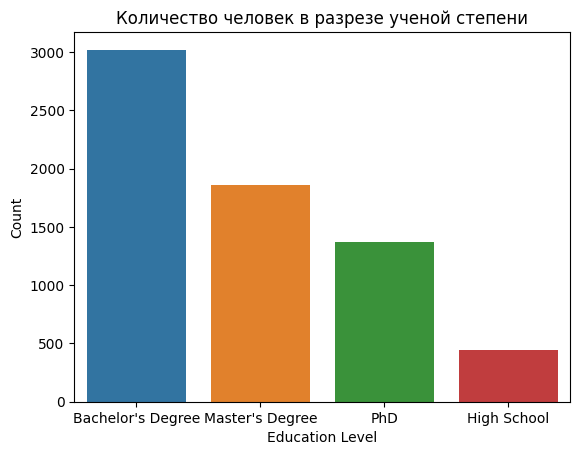

In [35]:
sns.barplot(x='Education Level', y='Count', hue = 'Education Level', data=sal_el_sorted);
plt.title('Количество человек в разрезе ученой степени');
#Как следует из графика, большая часть людей имеет степень (бакалавров больше всех)

In [37]:
sal_1["Job Title"].value_counts()

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64

In [38]:
sal_el_job = sal_1["Job Title"].value_counts().to_frame().reset_index()
sal_el_job.columns = ['Job Title', 'Count']
sal_el_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Job Title  191 non-null    object
 1   Count      191 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [40]:
# Посмотрим на топ 10 популярных профессий
sal_el_job_10 = sal_el_job.loc[:9]
sal_el_job_10

,Job Title,Count
0,Software Engineer,518
1,Data Scientist,453
2,Software Engineer Manager,376
3,Data Analyst,363
4,Senior Project Engineer,318
5,Product Manager,313
6,Full Stack Engineer,308
7,Marketing Manager,255
8,Back end Developer,244
9,Senior Software Engineer,244


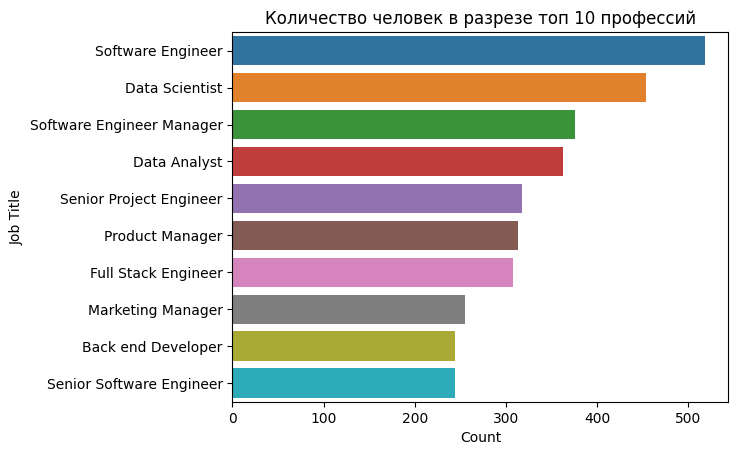

In [41]:
sns.barplot(x='Count', y='Job Title', hue = 'Job Title', data=sal_el_job_10);
plt.title('Количество человек в разрезе топ 10 профессий');

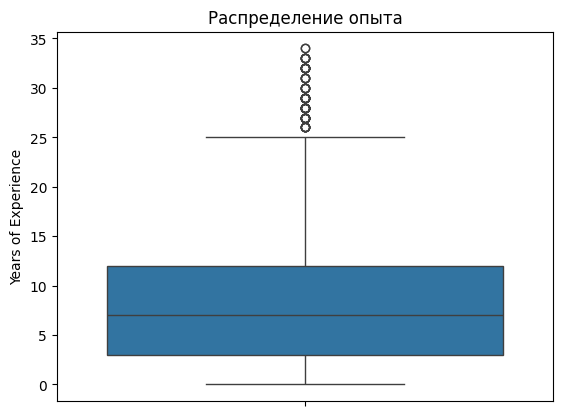

In [42]:
sns.boxplot(data=sal_1, y='Years of Experience')
plt.title("Распределение опыта")
plt.show()
#Cредний опыт - 5-7 лет. Есть люди с опытом более 25 лет. Опыт свыше 25 лет является выбросом.
#Можно предположить, что:
#(1) таких людей в целом немного (люди с 25+ годами стажа это люди, вероятно, возрастом 45+),
#(2) мало, кто из людей остается в одной сфере так долго. Люди, вероятно, склонны менять сферу.

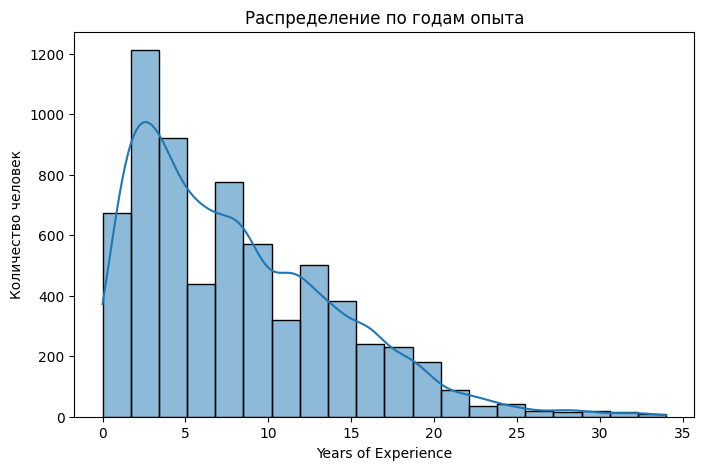

In [43]:
plt.figure(figsize=[8,5])
sns.histplot(data=sal_1, x="Years of Experience", bins=20, kde=True)
plt.title("Распределение по годам опыта")
plt.ylabel("Количество человек")
plt.show()
#Распределение схоже с аналогичным графиком с возрастом, что логично). Чем больше человеку лет, тем больше он, как правило, работал. И количество людей с возрастом становится меньше.

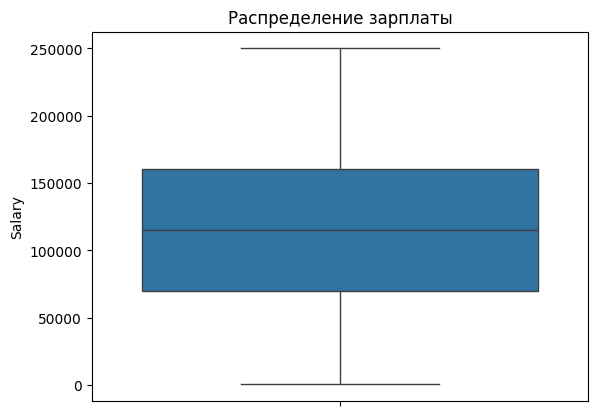

In [45]:
sns.boxplot(data=sal_1, y='Salary')
plt.title("Распределение зарплаты")
plt.show()
#Средняя зарплата 125 000, выбросов в данных не наблюдается

In [50]:
sal_1['Country'].value_counts()

Country
USA          1359
China        1343
Australia    1336
UK           1335
Canada       1325
Name: count, dtype: int64

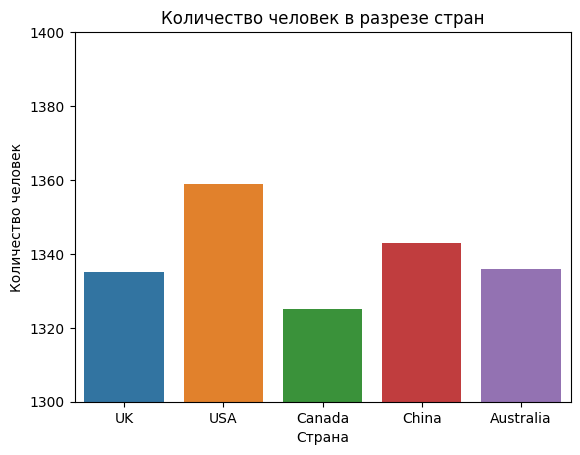

In [51]:
sns.countplot(data=sal_1, x="Country", hue = 'Country')
plt.title("Количество человек в разрезе стран")
plt.xlabel("Страна")
plt.ylabel("Количество человек")
plt.ylim(1300, 1400);
plt.show()

#В выборке больше представителей Северной Америки.

In [52]:
sal_1['Race'].value_counts()

Race
White               1962
Asian               1603
Korean               457
Australian           452
Chinese              444
Black                437
African American     354
Mixed                334
Welsh                333
Hispanic             322
Name: count, dtype: int64

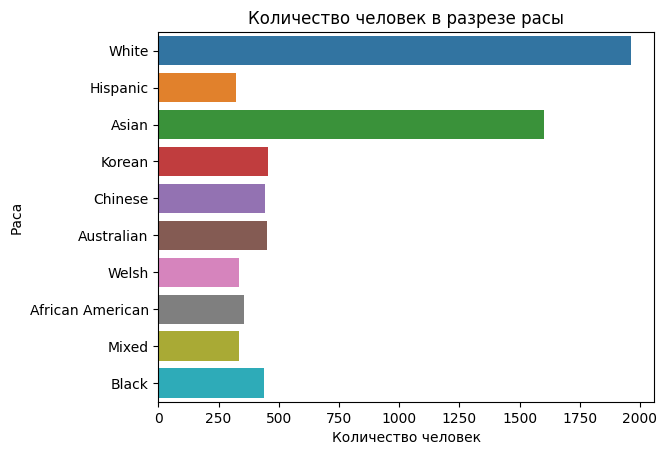

In [53]:
sns.countplot(data=sal_1, y="Race", hue = 'Race')
plt.title("Количество человек в разрезе расы")
plt.ylabel("Раса")
plt.xlabel("Количество человек")
plt.show()
#В выборке больше человек мажоритарных рас (национальности) (белые, азиаты)

**Гипотезы**

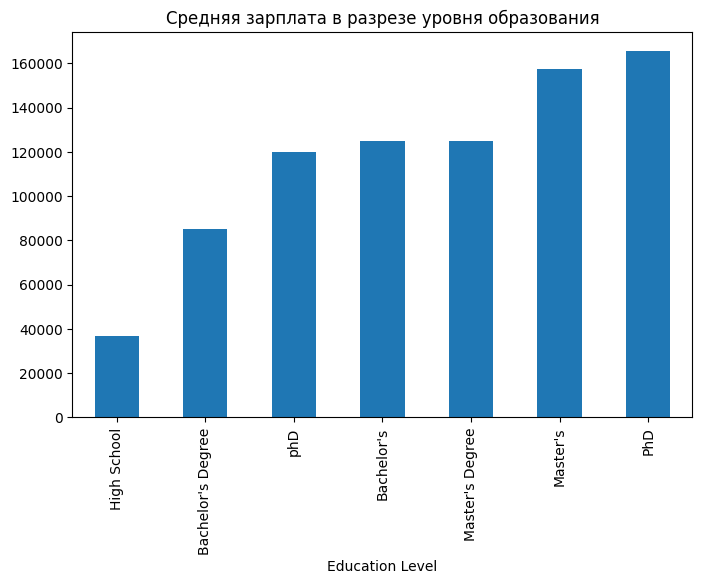

In [92]:
'''
Гипотеза - 1
Уровень зарплат растет с ростом уровня образования
'''
plt.figure(figsize=[8,5])
sal_1.groupby('Education Level')['Salary'].mean().sort_values().plot(kind="bar")
plt.title("Средняя зарплата в разрезе уровня образования")
plt.show()
#Гипотеза подтверждается

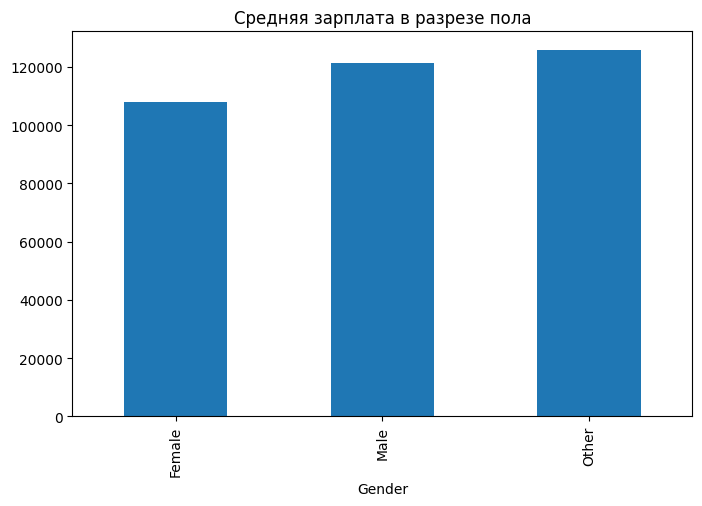

In [67]:
'''
Гипотеза - 2
Мужчины зарабатывают больше женщин
'''
plt.figure(figsize=[8,5])
sal_1.groupby('Gender')['Salary'].mean().plot(kind="bar")
plt.title("Средняя зарплата в разрезе пола")
plt.show()
#Гипотеза верна (показатели категории "Other" вряд ли повлияют на результаты, поскольку в данной категории мало человек (14), выбросов по значениям зарплат не было)

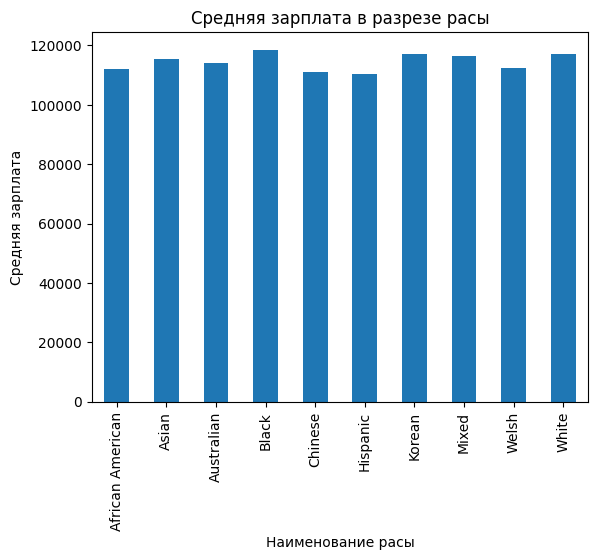

In [75]:
'''
Гипотеза - 3
Зарплата расы "white" в среднем выше, чем у остальных
'''

sal_1.groupby('Race')['Salary'].mean().plot(kind="bar")
plt.title("Средняя зарплата в разрезе расы")
plt.ylabel("Средняя зарплата")
plt.xlabel("Наименование расы")
plt.show()

#Гипотеза не подтверждается. Раса не влияет на уровень зарплат.

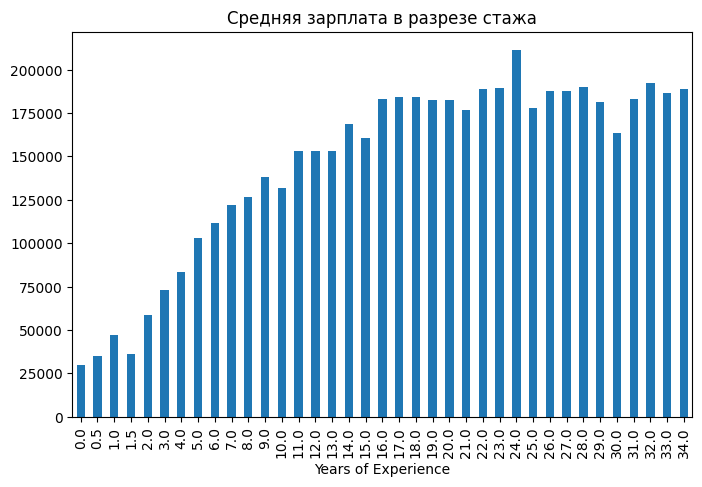

In [93]:
'''
Гипотеза - 4
Чем больше опыт, тем выше зарплата
'''
plt.figure(figsize=[8,5])
sal_1.groupby('Years of Experience')['Salary'].mean().plot(kind="bar")
plt.title("Средняя зарплата в разрезе стажа")
plt.show()

#Гипотеза не совсем верна (истинность утверждения зависит от того, какой период стажа мы рассматриваем)
#Зарплата растет до 15 лет стажа, но затем, начиная с 16-летнего стажа, ее уровень выравниванется, и стаж больше на уровень зарплаты не влияет.

<Axes: xlabel='Years of Experience', ylabel='Count'>

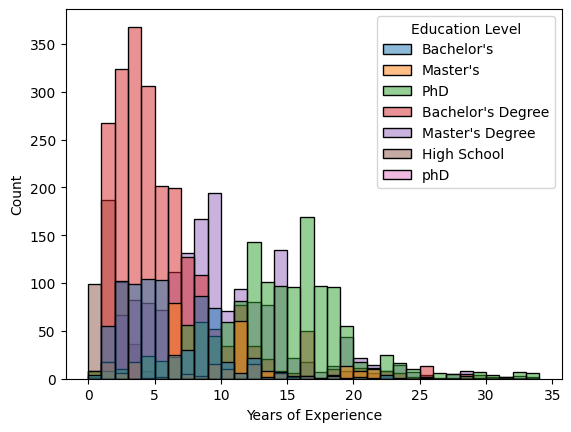

In [89]:
'''
Гипотеза - 5
Чем больше опыт, тем вероятнее, что у человека выше ученая степень
'''
sns.histplot(data=sal_1, x="Years of Experience", binwidth=1, hue="Education Level")

#Гипотеза подтверждается.
#С ростом опыта становится больше людей с более высоким уровнем образования.